In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind


# Read the CSV file into a DataFrame
df = pd.read_csv('Base.csv')

In [5]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:

# Applicant History (Old addresses, multiple devices)



In [17]:
# hypothesis 1: high name_email_similarity is indicative of lower fraud rates

from scipy.stats import shapiro

# check normality for fraudulent cases
stat_fraud, p_fraud = shapiro(df[df['fraud_bool'] == 1]['name_email_similarity'])
print("Shapiro-Wilk test for fraud cases:")
print("Statistic:", stat_fraud)
print("P-Value:", p_fraud)

# check normality for legitimate cases
stat_legit, p_legit = shapiro(df[df['fraud_bool'] == 0]['name_email_similarity'])
print("\nShapiro-Wilk test for legit cases:")
print("Statistic:", stat_legit)
print("P-Value:", p_legit)


Shapiro-Wilk test for fraud cases:
Statistic: 0.8980923891067505
P-Value: 0.0

Shapiro-Wilk test for legit cases:
Statistic: 0.9459712505340576
P-Value: 0.0


In [ ]:
# things to note:
# Shapiro-Wilk test may not be accurate since sample size is > 5000

# suppose choose significance level = 0.05 
# p value for both fraud and legit cases are very small, less than significance level
# cannot assume distribution of 'name_email_similarity' for both cases is normal - so using t-test is not accurate

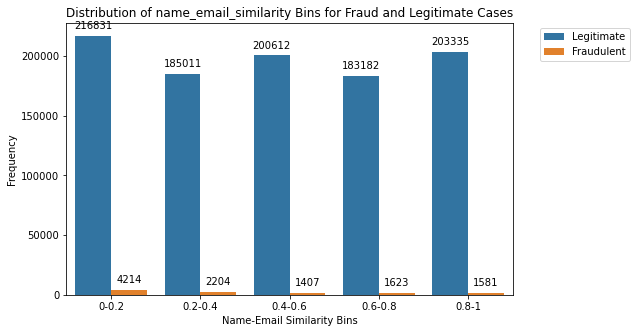

In [33]:
# alternative: feature engineering, create categorical bins using 'name_email_similarity'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous name_email_similarity feature into a categorical feature

# create categorical bins

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]  # specify the bin edges

# define bin labels
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=bin_edges, labels=bin_labels)

#  distribution of the new feature

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='name_email_similarity_bins', hue='fraud_bool', data=df)
plt.title('Distribution of name_email_similarity Bins for Fraud and Legitimate Cases')
plt.xlabel('Name-Email Similarity Bins')
plt.ylabel('Frequency')

# show value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# move the legend to the upper right
plt.legend(['Legitimate', 'Fraudulent'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

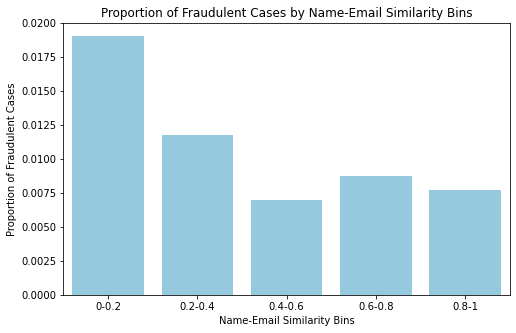

Chi-square Statistic: 1915.623944813102
P-Value: 0.0


In [34]:
from scipy.stats import chi2_contingency



df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]  # specify the bin edges

# define bin labels
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=bin_edges, labels=bin_labels)

# calculate the proportion of fraudulent cases within each similarity bin
fraud_proportions = df.groupby('name_email_similarity_bins')['fraud_bool'].mean()

# plot the proportion of fraudulent cases by similarity bin
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_proportions.index, y=fraud_proportions.values, color='skyblue')
plt.title('Proportion of Fraudulent Cases by Name-Email Similarity Bins')
plt.xlabel('Name-Email Similarity Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.show()

# statistical testing using Chi-square test
contingency_table = pd.crosstab(df['name_email_similarity_bins'], df['fraud_bool'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p)


In [ ]:
# the high chi-square value indicates a larger discrepancy between the observed and expected frequencies, suggesting a stronger association between name_email_similarity_bins and fraud occurrence.

# low p-value suggest strong evidence indicating that the observed association between name_email_similarity_bins and fraud occurrence is unlikely to be due to random chance.

# results provide strong evidence that there is a significant association between the level of name-email similarity and the likelihood of fraud occurrence. 
# the proportion of fraudulent cases varies significantly across different similarity bins
# this supports the hypothesis that high name_email_similarity is indicative of lower fraud rates.


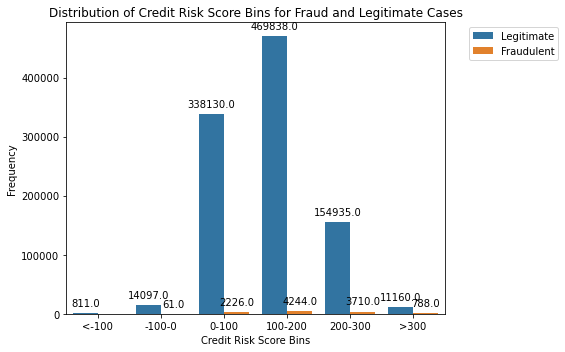

In [38]:


# Specify the bin edges for credit_risk_score
credit_risk_bin_edges = [-176, -100, 0, 100, 200, 300, 400]
credit_risk_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']

# Create 'credit_risk_score_bins' column
df['credit_risk_score_bins'] = pd.cut(df['credit_risk_score'], bins=credit_risk_bin_edges, labels=credit_risk_bin_labels)

# Plot the distribution of the new features
#plt.figure(figsize=(12, 6))


# Plot for credit_risk_score_bins
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(x='credit_risk_score_bins', hue='fraud_bool', data=df)
plt.title('Distribution of Credit Risk Score Bins for Fraud and Legitimate Cases')
plt.xlabel('Credit Risk Score Bins')
plt.ylabel('Frequency')

# Show value of each bar for credit_risk_score_bins
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Move the legend to the upper right
plt.legend(['Legitimate', 'Fraudulent'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Chi-square Statistic for Credit Risk Score Bins: 6409.052695890701
P-Value for Credit Risk Score Bins: 0.0
Reject the null hypothesis. There is a significant association between Credit Risk Score Bins and fraud occurrence.


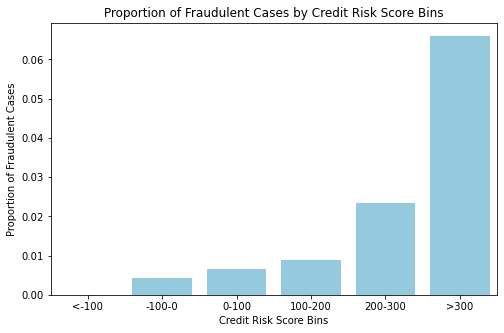

In [42]:
contingency_table_credit = pd.crosstab(df['credit_risk_score_bins'], df['fraud_bool'])

# chi-square test of independence
chi2_credit, p_credit, dof_credit, expected_credit = chi2_contingency(contingency_table_credit)

print("\nChi-square Statistic for Credit Risk Score Bins:", chi2_credit)
print("P-Value for Credit Risk Score Bins:", p_credit)

if p_credit < 0.05:
    print("Reject the null hypothesis. There is a significant association between Credit Risk Score Bins and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Credit Risk Score Bins and fraud occurrence.")

# plot proportion of fraudulent cases by credit risk score bins
fraud_proportions_credit = df.groupby('credit_risk_score_bins')['fraud_bool'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_proportions_credit.index, y=fraud_proportions_credit.values, color='skyblue')
plt.title('Proportion of Fraudulent Cases by Credit Risk Score Bins')
plt.xlabel('Credit Risk Score Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.show()

In [41]:

# large chi-square statistic and a low p-value indicate a significant association between credit risk score bins and fraud occurrence.

# so suggest that credit risk score of an applicant is significantly associated with the occurrence of fraud
# so suggest that applicants with different credit risk scores may exhibit different levels of fraudulent behavior
# appears that credit risk score could potentially serve as an important predictor for fraud detection and prevention strategies.

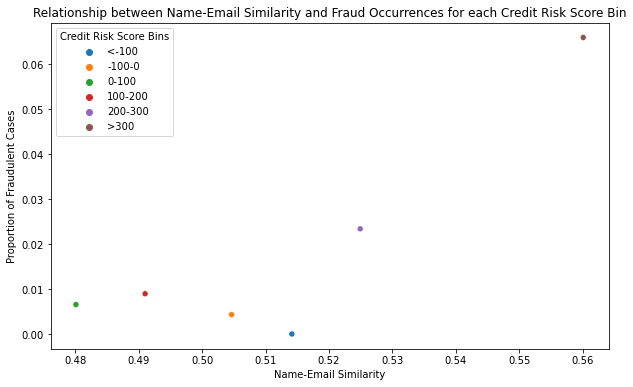

In [45]:
# 'name_email_similarity' and 'credit_risk_score' with fraud occurence

# Create categorical bins for 'name_email_similarity' and 'credit_risk_score'
name_email_bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
name_email_bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
credit_risk_bin_edges = [-176, -100, 0, 100, 200, 300, 400]
credit_risk_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=name_email_bin_edges, labels=name_email_bin_labels)
df['credit_risk_score_bins'] = pd.cut(df['credit_risk_score'], bins=credit_risk_bin_edges, labels=credit_risk_bin_labels)

# Group data by 'credit_risk_score_bins' and calculate mean of 'name_email_similarity' and proportion of fraudulent cases
grouped_data = df.groupby('credit_risk_score_bins').agg({'name_email_similarity': 'mean', 'fraud_bool': 'mean'}).reset_index()

# Plot the relationship between 'name_email_similarity' and proportion of fraudulent cases for each 'credit_risk_score' bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='name_email_similarity', y='fraud_bool', hue='credit_risk_score_bins', data=grouped_data)
plt.title('Relationship between Name-Email Similarity and Fraud Occurrences for each Credit Risk Score Bin')
plt.xlabel('Name-Email Similarity')
plt.ylabel('Proportion of Fraudulent Cases')
plt.legend(title='Credit Risk Score Bins')
plt.show()


In [87]:
# for credit risk score more than 0, proportion of fraud cases increases as name_email_similarity increases and 
# credit risk score increase

Mean name_email_similarity for fraud cases: 0.39316142802688364
Mean name_email_similarity for legitimate cases: 0.49481523479802036


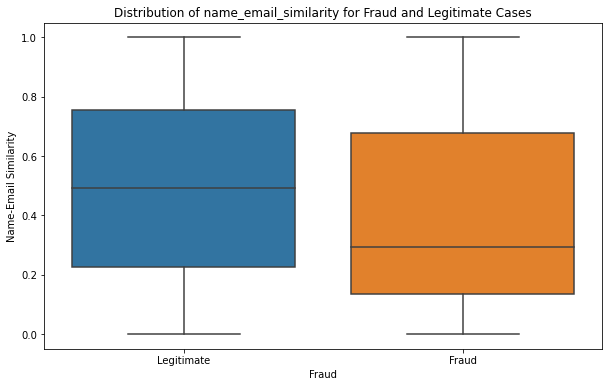

T-Statistic: -36.74437927596489
P-Value: 2.2555045287464665e-295
Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.


In [6]:

# hypothesis 1: high name_email_similarity is indicative of lower fraud rates

# Data Analysis
fraud_mean_similarity = df[df['fraud_bool'] == 1]['name_email_similarity'].mean()
legit_mean_similarity = df[df['fraud_bool'] == 0]['name_email_similarity'].mean()

print("Mean name_email_similarity for fraud cases:", fraud_mean_similarity)
print("Mean name_email_similarity for legitimate cases:", legit_mean_similarity)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity', data=df)
plt.title('Distribution of name_email_similarity for Fraud and Legitimate Cases')
plt.xlabel('Fraud')
plt.ylabel('Name-Email Similarity')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

# Statistical Testing
t_stat, p_value = ttest_ind(df[df['fraud_bool'] == 1]['name_email_similarity'],
                             df[df['fraud_bool'] == 0]['name_email_similarity'])

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in name_email_similarity between fraud and legitimate cases.")


In [8]:
# p value close to zero


#the t-statistic is significantly negative, indicating that the mean name_email_similarity for fraud cases is substantially lower than the mean for legitimate cases.

#extremely small p-value (2.25e-295) suggests strong evidence against the null hypothesis, indicating that the observed difference in name_email_similarity between fraud and legitimate cases is highly unlikely to occur by random chance alone.


#the significantly lower mean name_email_similarity for fraud cases compared to legitimate cases supports the hypothesis that higher name_email_similarity may indicate lower fraud rates.
#this implies that there may be a pattern or correlation between lower name_email_similarity and fraudulent behavior, suggesting that applicants with higher name-email dissimilarity may be more likely to engage in fraudulent activities.

#actionable insights: banks can potentially use name_email_similarity as one of the features in their fraud detection models. Lower similarity scores may trigger additional scrutiny or validation steps during the account opening process to mitigate the risk of fraudulent applications.
#the statistical analysis provides strong evidence to support the hypothesis, suggesting that higher name_email_similarity is associated with lower fraud rates in the dataset.

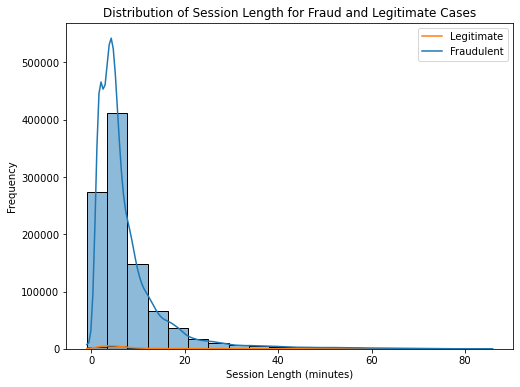

T-Statistic: 8.999825408764696
P-Value: 2.264571129440964e-19
Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.


In [46]:
# hypothesis of session length time with fraud

# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(8, 6))

# Session Length Distribution
sns.histplot(data=df, x='session_length_in_minutes', hue='fraud_bool', bins=20, kde=True)
plt.title('Distribution of Session Length for Fraud and Legitimate Cases')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

# Statistical Testing
t_stat, p_value = ttest_ind(fraudulent_accounts['session_length_in_minutes'].dropna(), 
                            legitimate_accounts['session_length_in_minutes'].dropna())

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in session length between fraud and legitimate cases.")

In [47]:
# - rejection of the null hypothesis shows that there is significant difference in session length between fraudulent and legitimate cases.
# - the significantly longer session lengths observed for legitimate cases compared to fraudulent cases support the hypothesis that legitimate applicants tend to spend more time engaging in the application process.
# - fraudulent accounts may exhibit shorter session lengths as fraudsters may rush through the process to avoid detection or due to their familiarity with fraudulent practices.

In [48]:
# Shapiro-Wilk test for session length of fraudulent accounts


# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

shapiro_stat_fraud, p_value_fraud = shapiro(fraudulent_accounts['session_length_in_minutes'].dropna())
print("Shapiro-Wilk test for session length of fraudulent accounts:")
print("Statistic:", shapiro_stat_fraud)
print("P-Value:", p_value_fraud)

# Shapiro-Wilk test for session length of legitimate accounts
shapiro_stat_legit, p_value_legit = shapiro(legitimate_accounts['session_length_in_minutes'].dropna())
print("\nShapiro-Wilk test for session length of legitimate accounts:")
print("Statistic:", shapiro_stat_legit)
print("P-Value:", p_value_legit)

Shapiro-Wilk test for session length of fraudulent accounts:
Statistic: 0.6363275051116943
P-Value: 0.0

Shapiro-Wilk test for session length of legitimate accounts:
Statistic: 0.6746711730957031
P-Value: 0.0


/Users/geraldwang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# both cases the p-values are extremely small shows that have evidence to suggest that the session length data for both fraudulent and legitimate accounts does not follow a normal distribution.

In [49]:
from scipy.stats import mannwhitneyu

# since 'session_length_in_minutes' not normal, use Mann-Whitney U test to check

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(fraudulent_accounts['session_length_in_minutes'], 
                                   legitimate_accounts['session_length_in_minutes'])

print("Mann-Whitney U Test Statistic:", statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in session length between fraud and legitimate cases.")


Mann-Whitney U Test Statistic: 5517591913.0
P-Value: 0.03401733619384683
Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.


In [ ]:
# with null hypothesis as theres no difference in session length between fraudulent and legitimate accounts.
# p value small < 0.05  means that there is sufficient evidence to conclude that there is a significant difference in session length between fraudulent and legitimate cases.
# applicants with longer session lengths are less likely to be involved in fraud compared to those with shorter session lengths. 

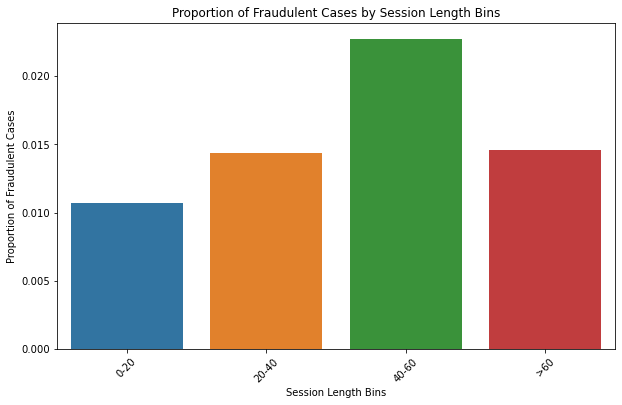

Chi-square Statistic: 195.5155992668295
P-Value: 3.927012708613344e-42
Reject the null hypothesis. There is a significant association between session length bins and fraud occurrence.


In [53]:
# Define categorical bins for session lengths
session_length_bins = pd.cut(df['session_length_in_minutes'], bins=[0, 20, 40, 60, 300],
                              labels=['0-20', '20-40', '40-60', '>60'])

# Add session length bins to the DataFrame
df['session_length_bins'] = session_length_bins

# Calculate the proportion of fraudulent cases in each session length bin
fraud_proportion_by_bin = df.groupby('session_length_bins')['fraud_bool'].mean()

# Plot the relationship between session length bins and the proportion of fraudulent cases
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_proportion_by_bin.index, y=fraud_proportion_by_bin.values)
plt.title('Proportion of Fraudulent Cases by Session Length Bins')
plt.xlabel('Session Length Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()

# Conduct statistical testing (e.g., chi-square test)
# Chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(df['session_length_bins'], df['fraud_bool']))

print("Chi-square Statistic:", chi2_stat)
print("P-Value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between session length bins and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between session length bins and fraud occurrence.")


In [ ]:
# null hypothesis: no association between session length bins and fraud occurrence
# rej null - conclude that there is a significant association between session length bins and fraud occurrence
# different session length bins are associated with different rates of fraudulent activity

# longer sessions = higher fraud rates?

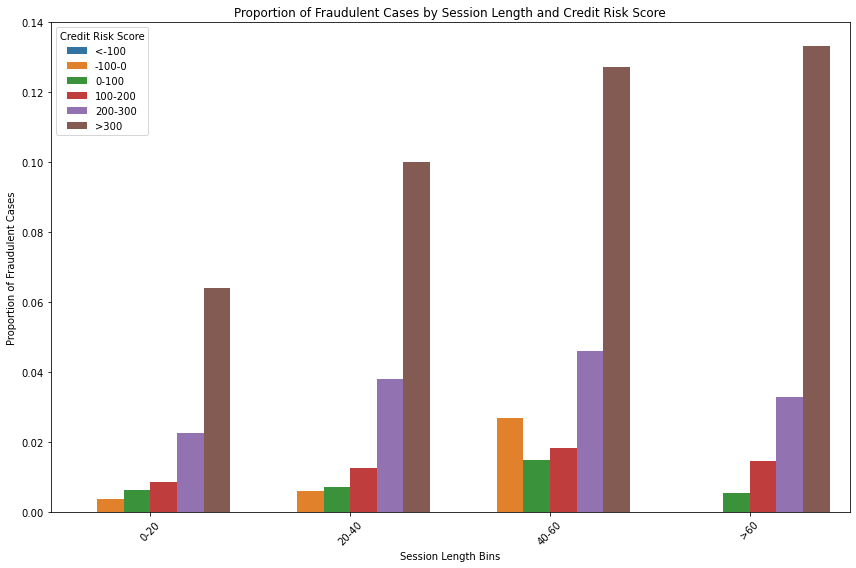

In [55]:


# Define session length bins


session_length_bins = pd.cut(df['session_length_in_minutes'], bins=[0, 20, 40, 60, 300],
                              labels=['0-20', '20-40', '40-60', '>60'])



# Add session length bins to the DataFrame
df['session_length_bins'] = session_length_bins

# Manually select intervals for credit risk score bins
credit_risk_score_bins = pd.cut(df['credit_risk_score'], bins=[-176, -100, 0, 100, 200, 300, 400],
                                labels=['<-100', '-100-0', '0-100', '100-200', '200-300', '>300'])



# Add credit risk score bins to the DataFrame
df['credit_risk_score_bins'] = credit_risk_score_bins

# Group by credit risk score and session length bins, calculate proportion of fraudulent cases
fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'session_length_bins'])['fraud_bool'].mean().reset_index()

# Plot the relationship between session length bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='session_length_bins', y='fraud_bool', hue='credit_risk_score_bins', data=fraud_proportion_by_bin)
plt.title('Proportion of Fraudulent Cases by Session Length and Credit Risk Score')
plt.xlabel('Session Length Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [73]:
# consistent with above results, longer sessions = higher fraud rates?

In [ ]:
# higher credit_risk_score = higher fraud rates

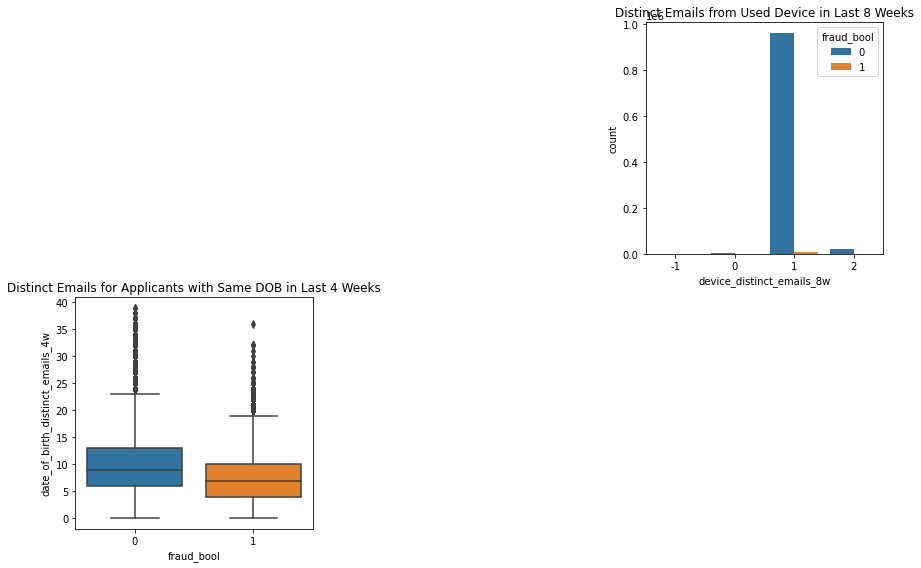

Column: prev_address_months_count
T-Statistic: -26.03948896560362
P-Value: 1.985831492732319e-149
Reject the null hypothesis. There is a significant difference in prev_address_months_count between fraud and legitimate cases.


Column: current_address_months_count
T-Statistic: 33.72034013374762
P-Value: 4.0220816728527425e-249
Reject the null hypothesis. There is a significant difference in current_address_months_count between fraud and legitimate cases.


Column: date_of_birth_distinct_emails_4w
T-Statistic: -43.26409621855827
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in date_of_birth_distinct_emails_4w between fraud and legitimate cases.


Column: bank_months_count
T-Statistic: -3.222285024545107
P-Value: 0.0012717662833232003
Reject the null hypothesis. There is a significant difference in bank_months_count between fraud and legitimate cases.




In [74]:

# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(12, 8))


# Device Usage History
plt.subplot(2, 3, 3)
sns.countplot(x='device_distinct_emails_8w', hue='fraud_bool', data=df)
plt.title('Distinct Emails from Used Device in Last 8 Weeks')

# Email History
plt.subplot(2, 3, 4)
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=df)
plt.title('Distinct Emails for Applicants with Same DOB in Last 4 Weeks')



plt.tight_layout()
plt.show()

# Statistical Testing
columns_of_interest = ['prev_address_months_count', 'current_address_months_count', 
                      'date_of_birth_distinct_emails_4w', 'bank_months_count']
for column in columns_of_interest:
    t_stat, p_value = ttest_ind(fraudulent_accounts[column].dropna(), 
                                legitimate_accounts[column].dropna())
    print(f"Column: {column}")
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in", column, "between fraud and legitimate cases.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in", column, "between fraud and legitimate cases.")
    print("\n")

In [75]:
#date_of_birth_distinct_emails_4w

# small p-value indicate a significant difference in date_of_birth_distinct_emails_4w between fraudulent and legitimate cases.
#- fraudulent accounts tend to have a significantly lower number of distinct emails for applicants with the same date of birth in the last 4 weeks compared to legitimate accounts. 
#- fraudsters may attempt to use the same date of birth across multiple fraudulent applications, resulting in a lower number of distinct emails associated with that date of birth.

# bank_months_count

# small p-value indicate a significant difference in bank_months_count between fraudulent and legitimate cases.
# fraudulent accounts tend to have a shorter bank account history (in months) compared to legitimate accounts. 
# shorter bank account histories may be associated with a higher likelihood of fraud.


#this supports the hypothesis that certain applicant history features, such as the number of distinct emails associated with the same date of birth and the length of bank account history, are correlated with fraud behavior.
#Financial institutions can leverage these insights to enhance their fraud detection and prevention strategies. For example, they can use the number of distinct emails associated with the same date of birth as a red flag for potential fraudulent activity. Similarly, shorter bank account histories may warrant additional scrutiny during the account approval process.


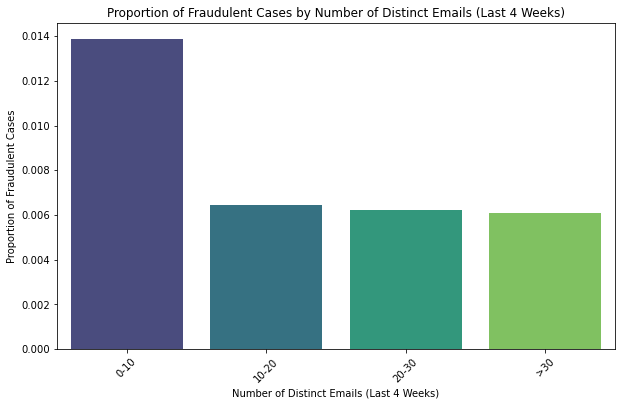

In [76]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Define the bin edges and labels for categorical binning
bin_edges = [0, 10, 20, 30, 50]  # Define your own bin edges as needed
bin_labels = ['0-10', '10-20', '20-30', '>30']  # Define corresponding labels

# Perform categorical binning
df['emails_bin'] = pd.cut(df['date_of_birth_distinct_emails_4w'], bins=bin_edges, labels=bin_labels)

# Assuming df contains the dataset with columns 'emails_bin' and 'fraud_bool'

# Calculate the proportion of fraudulent cases for each bin
fraud_proportion_by_bin = df.groupby('emails_bin')['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases
plt.figure(figsize=(10, 6))
sns.barplot(x='emails_bin', y='fraud_bool', data=fraud_proportion_by_bin, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks)')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()

In [77]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['emails_bin'], df['fraud_bool'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'emails_bin' and fraud occurrence.")

Chi-square Statistic: 1217.6179922113074
P-Value: 1.1032254840199512e-263
Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.


In [78]:
# suggests a substantial degree of association between the number of distinct emails and fraud occurrence
# can conclude the association between the 2 

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('fraud_bool ~ emails_bin', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                  sum_sq        df         F         PR(>F)
emails_bin     13.222255       3.0  406.3665  7.627917e-264
Residual    10831.385677  998660.0       NaN            NaN


In [80]:
# 'fraud_bool' is the outcome variable and 'emails_bin' is the predictor variable.
# specify typ=2 for Type 2 ANOVA, suitable for unbalanced designs.

# small p value indicate number of distinct emails is associated with the different fraud occurrence. 

# can conclude fraud accounts highly likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks

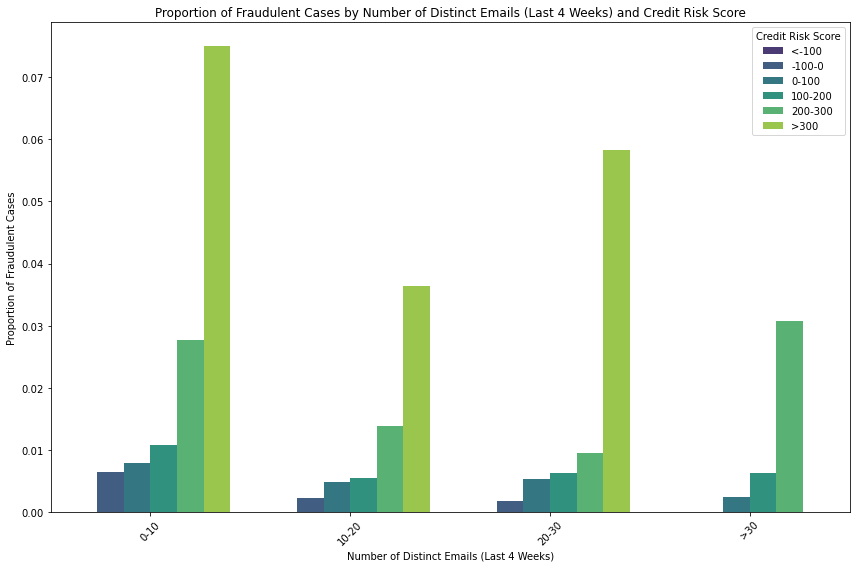

In [82]:
# Define custom bin edges and labels for 'credit_risk_score'
credit_score_bin_edges = [-176, -100, 0, 100, 200, 300, 400] # Define your own custom bin edges
credit_score_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']  # Define corresponding labels

# Perform categorical binning for 'credit_risk_score'
df['credit_risk_score_bin'] = pd.cut(df['credit_risk_score'], bins=credit_score_bin_edges, labels=credit_score_bin_labels)

# Group data by 'emails_bin' and 'credit_risk_score_bin' and calculate the mean of 'fraud_bool'
fraud_proportion_by_bin_and_score = df.groupby(['emails_bin', 'credit_risk_score_bin'])['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='emails_bin', y='fraud_bool', hue='credit_risk_score_bin', data=fraud_proportion_by_bin_and_score, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks) and Credit Risk Score')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()


In [83]:
from scipy.stats import chi2_contingency

# Group data by 'emails_bin'
grouped_data = df.groupby('emails_bin')

# Perform chi-square test for each group
for name, group in grouped_data:
    contingency_table = pd.crosstab(group['credit_risk_score_bin'], group['fraud_bool'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square Statistic for {name}: {chi2}")
    print(f"P-Value for {name}: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.")
    else:
        print("Fail to reject the null hypothesis.")
    print()


Chi-square Statistic for 0-10: 4678.808876630494
P-Value for 0-10: 0.0
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 10-20: 891.2579899466193
P-Value for 10-20: 2.075255119455771e-190
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 20-30: 60.04589827391419
P-Value for 20-30: 1.1891995640521045e-11
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for >30: 7.606145511696632
P-Value for >30: 0.17931925142841448
Fail to reject the null hypothesis.



In [85]:
# for the bins : 0-10, 10-20, 20-30, 
# significant association credit_risk_score and fraud occurence within emails_bins

# consistent results that fraud accounts highly likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks
# higher credit_risk_score lead to higher fraud rates

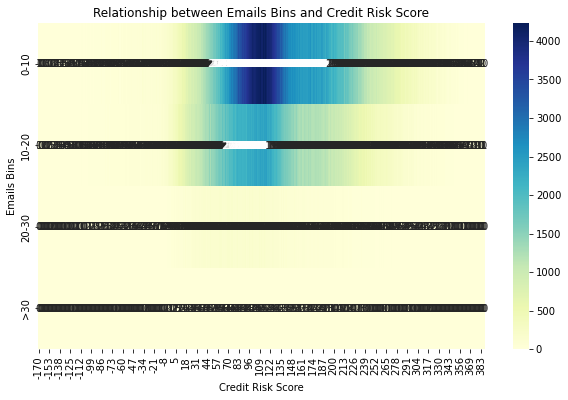

Chi-square Statistic: 24112.53408165076
P-Value: 0.0
Reject the null hypothesis. There is a significant association between 'emails_bins' and 'credit_risk_score'.


In [81]:
# Cross-tabulation
contingency_table = pd.crosstab(df['emails_bin'], df['credit_risk_score'])

# Visualization - Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Relationship between Emails Bins and Credit Risk Score')
plt.xlabel('Credit Risk Score')
plt.ylabel('Emails Bins')
plt.show()

# Statistical Test - Chi-square Test
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'emails_bins' and 'credit_risk_score'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'emails_bins' and 'credit_risk_score'.")


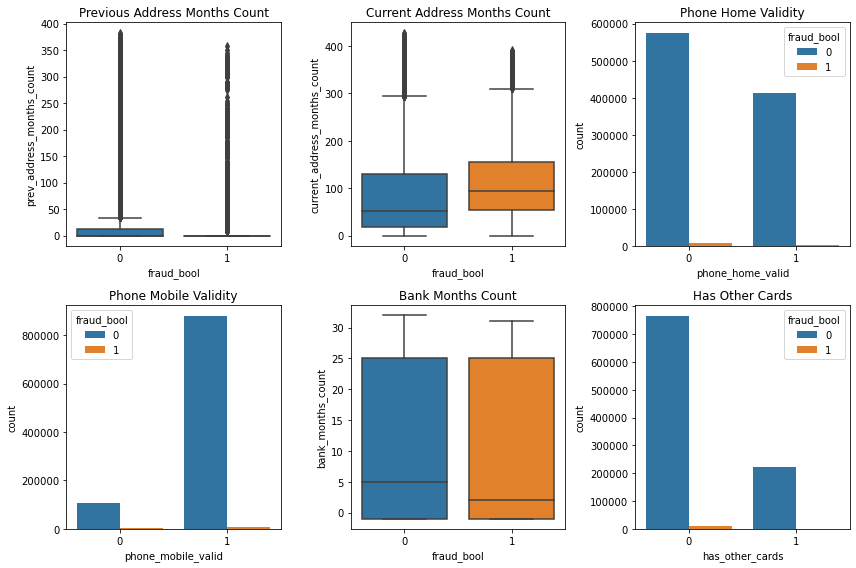

Column: prev_address_months_count
T-Statistic: -26.03948896560362
P-Value: 1.985831492732319e-149
Reject the null hypothesis. There is a significant difference in prev_address_months_count between fraud and legitimate cases.


Column: current_address_months_count
T-Statistic: 33.72034013374762
P-Value: 4.0220816728527425e-249
Reject the null hypothesis. There is a significant difference in current_address_months_count between fraud and legitimate cases.


Column: bank_months_count
T-Statistic: -3.222285024545107
P-Value: 0.0012717662833232003
Reject the null hypothesis. There is a significant difference in bank_months_count between fraud and legitimate cases.




In [9]:
# hypothesis 2
# Applicant’s history
#prev_address_months_count, current_address_months_count, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, foreign_request]
#Fraudulent accounts would likely have shady/suspicious history (eg. unusually short previous address, etc)


#Exploratory Data Analysis is performed using box plots and count plots to visualize the distribution of relevant columns between fraudulent and legitimate accounts.




# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(12, 8))

# Previous Address Months Count
plt.subplot(2, 3, 1)
sns.boxplot(x='fraud_bool', y='prev_address_months_count', data=df)
plt.title('Previous Address Months Count')

# Current Address Months Count
plt.subplot(2, 3, 2)
sns.boxplot(x='fraud_bool', y='current_address_months_count', data=df)
plt.title('Current Address Months Count')

# Phone Home Validity
plt.subplot(2, 3, 3)
sns.countplot(x='phone_home_valid', hue='fraud_bool', data=df)
plt.title('Phone Home Validity')

# Phone Mobile Validity
plt.subplot(2, 3, 4)
sns.countplot(x='phone_mobile_valid', hue='fraud_bool', data=df)
plt.title('Phone Mobile Validity')

# Bank Months Count
plt.subplot(2, 3, 5)
sns.boxplot(x='fraud_bool', y='bank_months_count', data=df)
plt.title('Bank Months Count')

# Has Other Cards
plt.subplot(2, 3, 6)
sns.countplot(x='has_other_cards', hue='fraud_bool', data=df)
plt.title('Has Other Cards')

plt.tight_layout()
plt.show()

# Statistical Testing
columns_of_interest = ['prev_address_months_count', 'current_address_months_count', 
                       'bank_months_count']
for column in columns_of_interest:
    t_stat, p_value = ttest_ind(fraudulent_accounts[column].dropna(), 
                                legitimate_accounts[column].dropna())
    print(f"Column: {column}")
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in", column, "between fraud and legitimate cases.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in", column, "between fraud and legitimate cases.")
    print("\n")
